In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation Libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# Deep Learning Libraries
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
#from scikeras.wrappers import KerasClassifier  # Use this instead of legacy keras.wrappers

In [3]:
Train_Dataset = pd.read_csv("fashion-mnist_train.csv")

In [4]:
Test_Dataset = pd.read_csv("fashion-mnist_test.csv")

In [5]:
Train_Dataset.shape

(60000, 785)

In [6]:
Test_Dataset.shape

(10000, 785)

In [7]:
# Digit MNIST Dataset. (Input Columns Exists as Flattened (784) )
X_Train = Train_Dataset.drop('label',axis = 1)
Y_Train = Train_Dataset['label']

In [8]:
X_Test = Test_Dataset.drop('label',axis = 1)
Y_Test = Test_Dataset['label']

In [9]:
print(f"Number of Rows and Columns of X_Train (Before Reshaped):{X_Train.shape}")
print(f"Number of Rows and Columns of Y_Train (Before Reshaped):{Y_Train.shape}")
print(f"Number of Rows and Columns of X_Test (Before Reshaped):{X_Test.shape}")
print(f"Number of Rows and Columns of Y_Test (Before Reshaped):{Y_Test.shape}")

Number of Rows and Columns of X_Train (Before Reshaped):(60000, 784)
Number of Rows and Columns of Y_Train (Before Reshaped):(60000,)
Number of Rows and Columns of X_Test (Before Reshaped):(10000, 784)
Number of Rows and Columns of Y_Test (Before Reshaped):(10000,)


| Variable  | Before Shape (DataFrame) | After `.values` | After `.reshape(-1, 28, 28)` |
| --------- | ------------------------ | --------------- | ---------------------------- |
| `X_Train` | `(60000, 784)`           | `(60000, 784)`  | `(60000, 28, 28)`            |
| `X_Test`  | `(10000, 784)`           | `(10000, 784)`  | `(10000, 28, 28)`            |

In [11]:
# Converting Panda DataFrame To Numpy Arrays For Both Train and Test Datasets (-1 Refers To Include All the Images)
X_Train_Arrayed = X_Train.values
X_Test_Arrayed = X_Test.values

X_Train_Arrayed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

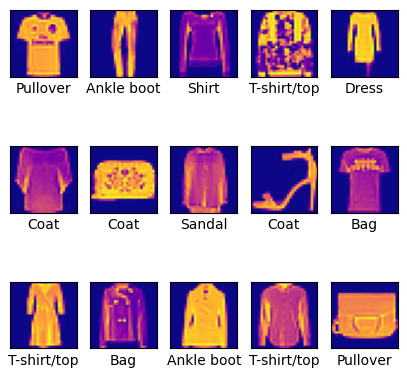

In [12]:
# Names of Clothing Accessories in order 
Column_Names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Visualizing the Digits
plt.figure(figsize=(5,5))

for Each_Number in range(15):
    plt.subplot(3, 5, Each_Number + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_Test_Arrayed[Each_Number].reshape(28, 28), cmap='plasma') #Reshaping Input Columns (Through Unflattening (784 -> 28 x 28))
    plt.xlabel(Column_Names[Y_Train[Each_Number]])

plt.show()

# NOTE : List of These Colors can be Used For cmap Instead of 'gray' = 'viridis' (Default),'plasma','inferno','magma','cividis','hot','cool','cubehelix'

### Reshaping Input Columns (Through Unflattening (784 -> 28 x 28)) From Both Train and Test Datasets

In [14]:
# Reshaping Only The Input Columns From Both Train and Test Datasets (-1 Refers To Include All the Images)
X_Train_Reshaped = X_Train_Arrayed.reshape(60000,784)
print(f"Number of Rows and Columns of X_Train_Reshaped :{X_Train_Reshaped.shape}")

X_Test_Reshaped = X_Test_Arrayed.reshape(10000,784)
print(f"Number of Rows and Columns of X_Test_Reshaped :{X_Test_Reshaped.shape}")

Number of Rows and Columns of X_Train_Reshaped :(60000, 784)
Number of Rows and Columns of X_Test_Reshaped :(10000, 784)


In [15]:
X_Test_Reshaped[0]

array([  0,   0,   0,   0,   0,   0,   0,   9,   8,   0,   0,  34,  29,
         7,   0,  11,  24,   0,   0,   3,   3,   1,   0,   1,   1,   0,
         0,   0,   0,   0,   4,   0,   0,   1,   0,   0,   0,   0,   0,
        44,  88,  99, 122, 123,  80,   0,   0,   0,   0,   1,   1,   1,
         0,   0,   0,   0,   0,   0,   1,   2,   0,   0,   0,   3,  46,
       174, 249,  67,   0,  94, 210,  61,  14, 212, 157,  37,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   2,   2,   0,  23, 168,
       206, 242, 239, 238, 214, 125,  61, 113,  74, 133, 236, 238, 236,
       203, 184,  20,   0,   1,   0,   0,   0,   0,   0,   1,   0,   0,
       175, 245, 223, 207, 205, 206, 216, 255, 237, 251, 232, 223, 212,
       200, 205, 216, 249, 173,   0,   0,   2,   0,   0,   0,   0,   7,
         0,  53, 225, 201, 197, 200, 201, 206, 199, 197, 185, 194, 204,
       232, 226, 249, 219, 194, 205, 229,  33,   0,   1,   0,   0,   0,
         0,   1,   0, 133, 223, 208, 192, 195, 233, 226, 216, 19

### Reshaping Output Column(s) (Through One Hot Encoding) From Both Train and Test Datasets

In [17]:
# One Hot Encoding the Digit MNIST Labels. Here, num_classes=10 Refers to the Digits From 0 To 9
# Similarly Output should always be in One Hot Encoding Format for ANN

Y_Train_One_Hot_Encoded = to_categorical(Y_Train, num_classes=10)
print(f"Number of Rows and Columns of Y_Train_One_Hot_Encoded :{Y_Train_One_Hot_Encoded.shape}")

Y_Test_One_Hot_Encoded = to_categorical(Y_Test, num_classes=10)
print(f"Number of Rows and Columns of Y_Test_One_Hot_Encoded :{Y_Test_One_Hot_Encoded.shape}")

Number of Rows and Columns of Y_Train_One_Hot_Encoded :(60000, 10)
Number of Rows and Columns of Y_Test_One_Hot_Encoded :(10000, 10)


In [18]:
Y_Train.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [19]:
Y_Train_One_Hot_Encoded[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
Y_Test.head()

0    0
1    1
2    2
3    2
4    3
Name: label, dtype: int64

In [21]:
Y_Test_One_Hot_Encoded[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
# Sigmoid - Its a Logistic Function (0 TO 1)
# 128 -> 64 -> 32 -> 10 are Nothing But Feed Forward and Again 10 -> 128 is Back Probagation

Input_Units = 784
Dense_Output_01 = 128
Dense_Output_02 = 64
Dense_Output_03 = 32
Output = 10 

#Creating Base Neural Network
model = keras.Sequential([
    layers.Dense(Dense_Output_01, activation='relu', input_shape=(Input_Units,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(Dense_Output_02, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(Dense_Output_03, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(Output,activation='sigmoid'),
])

# NOTE : 
# Benefits of Using layers.BatchNormalization() are Faster Training, Higher learning Rates, Prevent Overfitting (To a small extent), 
# Reduces Sensitivity to Initialization

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [24]:
# Compiling the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [25]:
Fitted_Model = model.fit(X_Train_Reshaped, Y_Train_One_Hot_Encoded, batch_size=100, epochs=10, validation_data=(X_Test_Reshaped, Y_Test_One_Hot_Encoded))

Epoch 1/10


600/600 [==============================] - 10s 10ms/step - loss: 0.9075 - accuracy: 0.6917 - val_loss: 0.5017 - val_accuracy: 0.8170
Epoch 2/10
600/600 [==============================] - 5s 9ms/step - loss: 0.6058 - accuracy: 0.7963 - val_loss: 0.4144 - val_accuracy: 0.8564
Epoch 3/10
600/600 [==============================] - 6s 9ms/step - loss: 0.5527 - accuracy: 0.8135 - val_loss: 0.4069 - val_accuracy: 0.8575
Epoch 4/10
600/600 [==============================] - 5s 9ms/step - loss: 0.5286 - accuracy: 0.8223 - val_loss: 0.4227 - val_accuracy: 0.8442
Epoch 5/10
600/600 [==============================] - 5s 9ms/step - loss: 0.5059 - accuracy: 0.8286 - val_loss: 0.4456 - val_accuracy: 0.8560
Epoch 6/10
600/600 [==============================] - 5s 9ms/step - loss: 0.4913 - accuracy: 0.8344 - val_loss: 0.4703 - val_accuracy: 0.8479
Epoch 7/10
600/600 [==============================] - 5s 9ms/step - loss: 0.4811 - accuracy: 0.8366 - val_loss: 0.4409 - val_accuracy: 0.8675
Ep

In [26]:
Loss_In_Test_Data, Accuracy_In_Test_Data = model.evaluate(X_Test_Reshaped, Y_Test_One_Hot_Encoded)

313/313 [==============================] - 2s 4ms/step - loss: 0.4331 - accuracy: 0.8632


In [27]:
print('Fashion MNIST Test Accuracy:', round(Accuracy_In_Test_Data, 4))

Fashion MNIST Test Accuracy: 0.8632


In [28]:
# Predicting Labels-Fashion
Y_Predicted = model.predict(X_Test_Reshaped)

313/313 [==============================] - 1s 3ms/step


In [29]:
# Here We Get the Index of Maximum Value in the Encoded Vector for y_predict
Y_Predicted_Max = np.argmax(Y_Predicted, axis=1)
Y_Predicted_Max

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [30]:
# Here We Get the Index of Maximum Value in the Encoded Vector for y_test_Fashion
Y_Test_One_Hot_Encoded_Max = np.argmax(Y_Test_One_Hot_Encoded, axis=1)
Y_Test_One_Hot_Encoded_Max

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [31]:
print("Y_Predicted_Max - Shape:", Y_Predicted_Max.shape, "dtype:", Y_Predicted_Max.dtype)
print("Y_Test_One_Hot_Encoded_Max - Shape:", Y_Test_One_Hot_Encoded_Max.shape, "dtype:", Y_Test_One_Hot_Encoded_Max.dtype)

Y_Predicted_Max - Shape: (10000,) dtype: int64
Y_Test_One_Hot_Encoded_Max - Shape: (10000,) dtype: int64


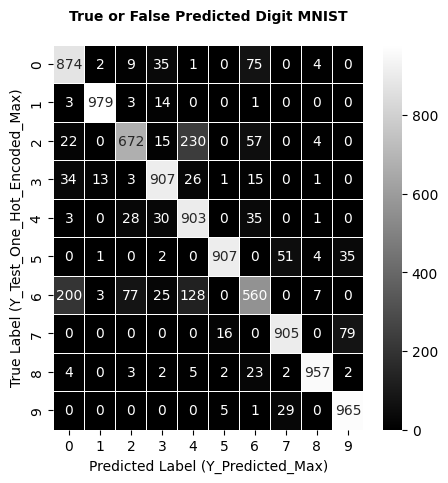

In [32]:
# Confusion Matrix for Digit MNIST
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
Confusion_Matrix = confusion_matrix(Y_Test_One_Hot_Encoded_Max, Y_Predicted_Max)

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size': 10}, linewidths=0.5, fmt="d", cmap="gray")

plt.title('True or False Predicted Digit MNIST\n', fontweight='bold', fontsize=10)
plt.xlabel('Predicted Label (Y_Predicted_Max)')
plt.ylabel('True Label (Y_Test_One_Hot_Encoded_Max)')
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test_One_Hot_Encoded_Max, Y_Predicted_Max))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.85      0.67      0.75      1000
           3       0.88      0.91      0.89      1000
           4       0.70      0.90      0.79      1000
           5       0.97      0.91      0.94      1000
           6       0.73      0.56      0.63      1000
           7       0.92      0.91      0.91      1000
           8       0.98      0.96      0.97      1000
           9       0.89      0.96      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



In [34]:
print(Fitted_Model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


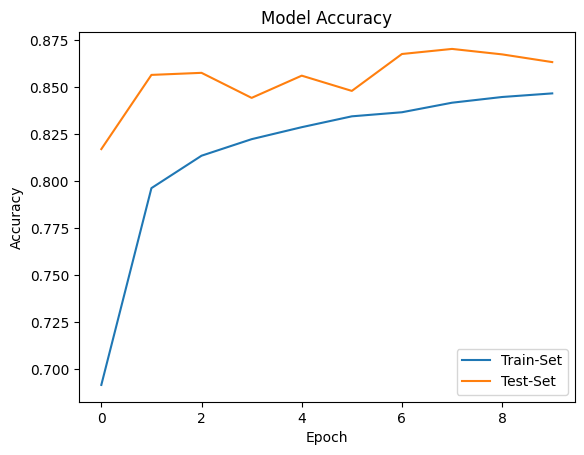

In [35]:
# summarize history for accuracy
plt.plot(Fitted_Model.history['accuracy']) #Comes in Y-Axis
plt.plot(Fitted_Model.history['val_accuracy']) #Comes in X-Axis
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train-Set', 'Test-Set'], loc='best')
plt.show()

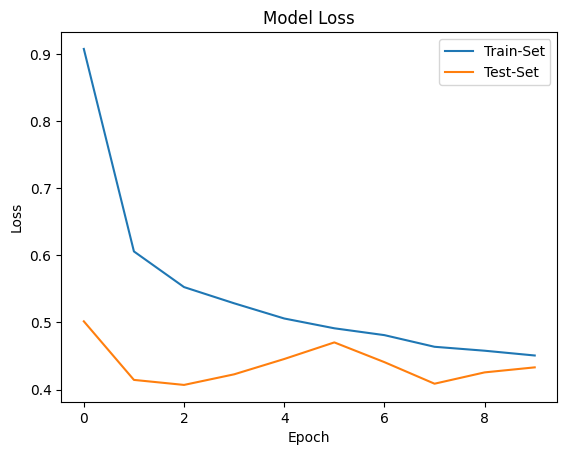

In [36]:
plt.plot(Fitted_Model.history['loss']) #Comes in Y-Axis
plt.plot(Fitted_Model.history['val_loss']) #Comes in X-Axis
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train-Set', 'Test-Set'], loc='best')
plt.show()

In [37]:
Y_Predicted_Single = model.predict(X_Test_Reshaped[[0]])

1/1 [==============================] - 0s 66ms/step


In [38]:
# Here We Get the Index of Maximum Value in the Encoded Vector for Y_Predicted_Single
Y_Predicted_Single_Max = np.argmax(Y_Predicted_Single, axis=1) 
Y_Predicted_Single_Max

array([0], dtype=int64)

In [39]:
# Here We Get the Index of Maximum Value in the Encoded Vector for Y_Test_One_Hot_Encoded
Y_Test_One_Hot_Encoded_Max = np.argmax(Y_Test_One_Hot_Encoded, axis=1)
Y_Test_One_Hot_Encoded_Max

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [40]:
Y_Test_One_Hot_Encoded_Max[0]

0

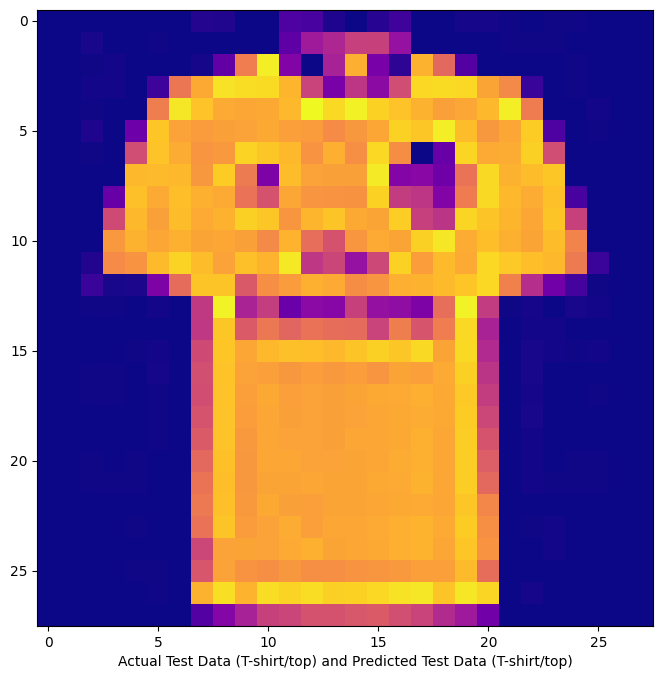

In [81]:
Test_Data_Input = X_Test_Reshaped[0]
Test_Data_Output = Y_Test_One_Hot_Encoded_Max[0]
Test_Data_Predicted_Max = Y_Predicted_Single_Max[0]  

#Names of clothing accessories in order 
Column_Names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Visualizing the Digits
plt.figure(figsize=(8,8))
plt.imshow(Test_Data_Input.reshape(28,28), cmap='plasma')
plt.xlabel("Actual Test Data ({}) and Predicted Test Data ({})".format( Column_Names[np.argmax(Test_Data_Output)], 
                                                                               Column_Names[Test_Data_Predicted_Max]) )
plt.show()